# 01 경사 하강법

## 경사 하강법

경사 하강법

In [2]:
x = 10
learning_rate = 0.2
precision = 0.00001
max_iterations = 100
# 손실 함수를 람다식으로 정의
loss_func = lambda x: (x - 3) ** 2 + 10
# 그래디언트를 람다식으로 정의 (손실 함수의 1차 미분값)
gradient = lambda x: 2 * x - 6

In [3]:
# 그래디언트 강하법
for i in range(max_iterations):
  x = x - learning_rate * gradient(x)
  print("손실 함수의 값(", x, ") =", loss_func(x))
print("최솟값= ", x)

손실 함수의 값( 7.199999999999999 ) = 27.639999999999993
손실 함수의 값( 5.52 ) = 16.350399999999997
손실 함수의 값( 4.512 ) = 12.286143999999998
손실 함수의 값( 3.9071999999999996 ) = 10.82301184
손실 함수의 값( 3.54432 ) = 10.2962842624
손실 함수의 값( 3.3265919999999998 ) = 10.106662334464
손실 함수의 값( 3.1959551999999998 ) = 10.03839844040704
손실 함수의 값( 3.11757312 ) = 10.013823438546535
손실 함수의 값( 3.070543872 ) = 10.004976437876753
손실 함수의 값( 3.0423263232 ) = 10.001791517635631
손실 함수의 값( 3.02539579392 ) = 10.000644946348826
손실 함수의 값( 3.015237476352 ) = 10.000232180685577
손실 함수의 값( 3.0091424858112 ) = 10.000083585046807
손실 함수의 값( 3.00548549148672 ) = 10.000030090616852
손실 함수의 값( 3.003291294892032 ) = 10.000010832622067
손실 함수의 값( 3.0019747769352194 ) = 10.000003899743945
손실 함수의 값( 3.0011848661611316 ) = 10.00000140390782
손실 함수의 값( 3.000710919696679 ) = 10.000000505406815
손실 함수의 값( 3.0004265518180073 ) = 10.000000181946453
손실 함수의 값( 3.0002559310908046 ) = 10.000000065500723
손실 함수의 값( 3.0001535586544827 ) = 10.00000002358026
손실

2차원 그래디언트

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
# 참고 박스
X, Y = np.meshgrid(x, y)
# numpy 연산
Z = X ** 2 + Y ** 2

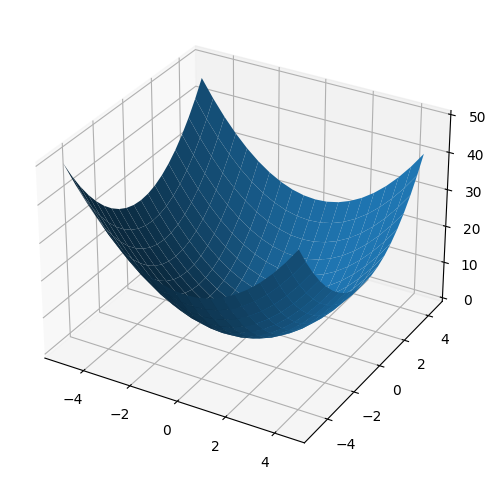

In [5]:
# 3차원 그래프 그려보기
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
U = -2 * X     # 그래디언트의 음수
V = -2 * Y

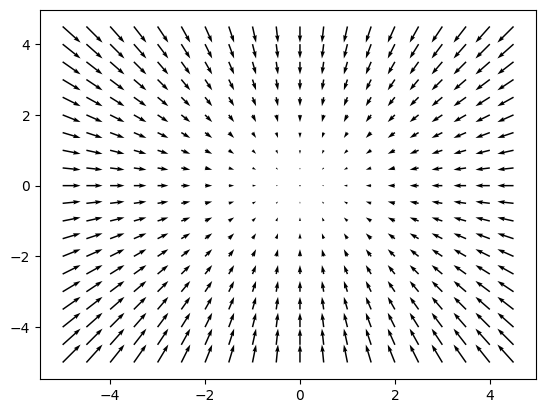

In [7]:
plt.figure()
Q = plt.quiver(X, Y, U, V, units = 'width')
plt.show()

# 02 미니 배치와 모멘텀

## 다층 퍼셉트론 모델링

다층 퍼셉트론

In [8]:
import numpy as np
# Sigmoid 함수
def actf(x):
  return 1 / (1 + np.exp(-x))

# Sigmoid 함수의 미분치
def actf_deriv(x):
  return x * (1 - x)

In [9]:
# 입력, 은닉, 출력 노드의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 집합의 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

# 가중치를 -1.0에서 1.0사이의 난수로 초기화
W1 = 2 * np.random.random((inputs, hiddens)) - 1
W2 = 2 * np.random.random((hiddens, outputs)) - 1
B1 = np.zeros(hiddens)
B2 = np.zeros(outputs)

In [10]:
# 순방향 전파 계산
def predict(x):
  layer0 = x     # 입력을 layer0에 대입
  Z1 = np.dot(layer0, W1) + B1     # 행렬의 곱 계산
  layer1 = actf(Z1)     # 활성화 함수 적용
  Z2 = np.dot(layer1, W2) + B2     # 행렬의 곱 계산
  layer2 = actf(Z2)     # 활성화 함수 적용
  return layer0, layer1, layer2

In [11]:
# 역방향 전파 계산
def fit():
  global W1, W2, B1, B2
  for i in range(60000):
    layer0, layer1, layer2 = predict(X)
    layer2_error = layer2 - T
    layer2_delta = layer2_error * actf_deriv(layer2)
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * actf_deriv(layer1)

    W2 += -learning_rate * np.dot(layer1.T, layer2_delta) / 4.0
    W1 += -learning_rate * np.dot(layer0.T, layer1_delta) / 4.0
    B2 += - learning_rate * np.sum(layer2_delta, axis = 0) / 4.0
    B1 += -learning_rate * np.sum(layer1_delta, axis = 0) / 4.0

In [12]:
def test():
  for x, y in zip(X, T):
    x = np.reshape(x, (1, -1))     # 하나여도 2차원 형태이어야 함
    layer0, layer1, layer2 = predict(x)
    print(x, y, layer2)

fit()
test()

[[0 0]] [0] [[0.01294955]]
[[0 1]] [1] [[0.9851549]]
[[1 0]] [1] [[0.98512394]]
[[1 1]] [0] [[0.01412578]]
